In [216]:
import geemap
import pandas as pd
import ee
import geopandas as gdp
import random
import matplotlib.pyplot as plt
import seaborn as sns


In [217]:
data=pd.read_csv('cleaned_data.csv')

In [218]:
data


,Unnamed: 0,id,region,price,year,manufacturer,state,lat,long,posting_date,removal_date
0,362773,7307679724,abilene,4500,2002.0,bmw,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,abilene,4500,2002.0,bmw,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,abilene,4900,2006.0,toyota,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,abilene,6500,2008.0,ford,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,abilene,6500,2008.0,ford,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...
426875,303849,7307070484,zanesville / cambridge,5100,2009.0,NaN,oh,39.937000,-82.031500,2021-04-15 00:00:00+00:00,2021-04-21 00:00:00+00:00
426876,303706,7314635557,zanesville / cambridge,7500,2011.0,ford,oh,39.927400,-82.004100,2021-04-30 00:00:00+00:00,2021-05-15 00:00:00+00:00
426877,303704,7314710341,zanesville / cambridge,25000,2016.0,chevrolet,oh,39.896865,-82.042283,2021-04-30 00:00:00+00:00,2021-05-12 00:00:00+00:00
426878,303670,7316225330,zanesville / cambridge,6,1986.0,NaN,oh,39.938630,-82.006760,2021-05-03 00:00:00+00:00,2021-05-08 00:00:00+00:00


In [219]:
#clean the data
print(data.isnull().sum())

Unnamed: 0          0
id                  0
region              0
price               0
year             1205
manufacturer    17646
state               0
lat              6549
long             6549
posting_date       68
removal_date       68
dtype: int64


In [220]:
null_col=['year','manufacturer','lat','long','posting_date','removal_date']
data_cleaned=data.dropna(subset=null_col)
print(data_cleaned.isnull().sum())

Unnamed: 0      0
id              0
region          0
price           0
year            0
manufacturer    0
state           0
lat             0
long            0
posting_date    0
removal_date    0
dtype: int64


In [5]:
ee.Authenticate()

Enter verification code: 4/1AfJohXkAT4QZ8xL9tgktEcWDV5od0kvPFjSQcvFEBfc8Nx1Aj_YCDwetcGo

Successfully saved authorization token.


In [221]:
data_cleaned['manufacturer'].unique()

array(['bmw', 'toyota', 'ford', 'honda', 'chrysler', 'buick', 'saturn',
       'chevrolet', 'ram', 'jeep', 'nissan', 'dodge', 'gmc', 'lincoln',
       'kia', 'volkswagen', 'tesla', 'subaru', 'hyundai', 'infiniti',
       'mercedes-benz', 'mazda', 'cadillac', 'lexus', 'mercury', 'volvo',
       'acura', 'porsche', 'rover', 'audi', 'mini', 'mitsubishi',
       'jaguar', 'alfa-romeo', 'fiat', 'pontiac', 'harley-davidson',
       'datsun', 'ferrari', 'morgan', 'aston-martin', 'land rover'],
      dtype=object)

In [222]:
data.columns

Index(['Unnamed: 0', 'id', 'region', 'price', 'year', 'manufacturer', 'state',
       'lat', 'long', 'posting_date', 'removal_date'],
      dtype='object')

In [223]:
data.describe()
data_cleaned.head(100)


,Unnamed: 0,id,region,price,year,manufacturer,state,lat,long,posting_date,removal_date
0,362773,7307679724,abilene,4500,2002.0,bmw,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,abilene,4500,2002.0,bmw,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,abilene,4900,2006.0,toyota,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,abilene,6500,2008.0,ford,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,abilene,6500,2008.0,ford,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...
96,362848,7302206549,abilene,29999,2015.0,ford,tx,30.649697,-97.866554,2021-04-05 00:00:00+00:00,2021-04-11 00:00:00+00:00
97,362648,7316320869,abilene,36885,2015.0,chevrolet,tx,30.648959,-97.867069,2021-05-03 00:00:00+00:00,2021-05-21 00:00:00+00:00
98,362757,7309533271,abilene,34899,2015.0,chevrolet,tx,30.663000,-97.931600,2021-04-19 00:00:00+00:00,2021-05-08 00:00:00+00:00
99,362663,7315453838,abilene,48888,2015.0,ford,tx,30.649254,-97.866211,2021-05-01 00:00:00+00:00,2021-05-22 00:00:00+00:00


In [226]:
len(data)
len(data_cleaned)
data_cleaned['removal_date'].dtype
data2=data_cleaned
data2['removal_date']=pd.to_datetime(data2['removal_date'])
data2['posting_date']=pd.to_datetime(data2['posting_date'])
print(data2['removal_date'].dtype)

#frequency at which the manufacturers products are being sold
data2['time_diff']=(data2['removal_date']-data2['posting_date']).dt.days
print(data2['time_diff'])
manufacturer_frequency = data2.groupby('manufacturer')['time_diff'].mean()
print(manufacturer_frequency)

datetime64[ns, UTC]
0         16
1          4
2         32
3         10
4         18
          ..
426873     8
426874     9
426876    15
426877    12
426879    22
Name: time_diff, Length: 402956, dtype: int64
manufacturer
acura              15.807182
alfa-romeo         15.704258
aston-martin       14.791667
audi               15.546283
bmw                15.564021
buick              15.584153
cadillac           15.396352
chevrolet          15.561199
chrysler           15.702694
datsun             16.222222
dodge              15.525256
ferrari            15.663158
fiat               15.802532
ford               15.583975
gmc                15.630070
harley-davidson    16.203947
honda              15.650800
hyundai            15.441400
infiniti           15.851417
jaguar             15.508239
jeep               15.718282
kia                15.689210
land rover         16.523810
lexus              15.602684
lincoln            15.455985
mazda              15.552056
mercedes-benz      15.72

In [227]:
grouped_data = data2.groupby('manufacturer')

# To see the size of each group (number of rows for each manufacturer)
group_sizes = grouped_data.size()
print(group_sizes)
#threshold for manufacturers with < 500 products

filtered_data = grouped_data.filter(lambda group: len(group) >= 500)

# size of each group in the filtered DataFrame
data3 = filtered_data.groupby('manufacturer')
print(data3)


manufacturer
acura               5959
alfa-romeo           869
aston-martin          24
audi                7465
bmw                13847
buick               5490
cadillac            6908
chevrolet          54380
chrysler            6014
datsun                63
dodge              13462
ferrari               95
fiat                 790
ford               69854
gmc                16668
harley-davidson      152
honda              21134
hyundai            10256
infiniti            4765
jaguar              1942
jeep               18838
kia                 8369
land rover            21
lexus               7898
lincoln             4169
mazda               5398
mercedes-benz      10805
mercury             1179
mini                2313
mitsubishi          3289
morgan                 3
nissan             18886
pontiac             2279
porsche             1350
ram                17963
rover               2097
saturn              1089
subaru              9458
tesla                866
toyota      

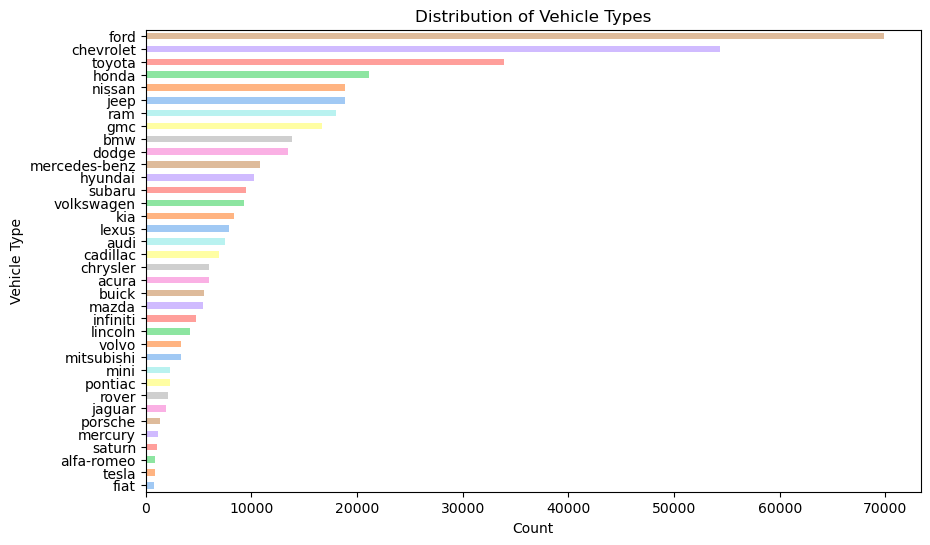

In [228]:
# Extract the vehicle types and their counts
counts = data3['manufacturer'].value_counts()

# Set up a color palette for the bar plot
colors = sns.color_palette('pastel')

# Plot a horizontal bar plot
plt.figure(figsize=(10, 6))
counts.sort_values().plot(kind='barh', color=colors)
plt.title('Distribution of Vehicle Types')
plt.xlabel('Count')
plt.ylabel('Vehicle Type')
plt.show()


In [229]:
ee.Authenticate()
ee.Initialize()

In [230]:
data4=data2.iloc[:1000]
gdf=gdp.GeoDataFrame(data4,geometry=gdp.points_from_xy(data4['long'],data4['lat']))
#geodataframe timestamp cant be convertedto json
gdf['removal_date'] = gdf['removal_date'].astype(str)
gdf['posting_date'] = gdf['posting_date'].astype(str)
gdf=gdf.set_crs(epsg='4326',inplace=True)
gdf_json=gdf.to_json()

Map = geemap.Map()

ee_fc = ee.FeatureCollection([ee.Geometry.Point(lon, lat) for lon, lat in zip(gdf['long'], gdf['lat'])])

unique_manufacturers = gdf['manufacturer'].dropna().unique()

# a dictionary to map manufacturers to random colors
manufacturer_colors = {manufacturer: "#{:06x}".format(random.randint(0, 0xFFFFFF)) for manufacturer in unique_manufacturers}

# Iterate over unique manufacturers and add points with different colors
for manufacturer, color in manufacturer_colors.items():
    manufacturer_gdf = gdf[gdf['manufacturer'] == manufacturer]
    ee_fc = geemap.geopandas_to_ee(manufacturer_gdf)
    Map.addLayer(ee_fc, {'color': color}, manufacturer)

# Add a legend to the map
legend_dict = {manufacturer: color for manufacturer, color in manufacturer_colors.items()}
Map.add_legend(legend_dict=legend_dict, title='Manufacturers')
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [231]:
filtered_data.columns
data5=filtered_data.drop('Unnamed: 0',axis=1)
data5

,id,region,price,year,manufacturer,state,lat,long,posting_date,removal_date,time_diff
0,7307679724,abilene,4500,2002.0,bmw,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00,16
1,7311833696,abilene,4500,2002.0,bmw,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00,4
2,7311441996,abilene,4900,2006.0,toyota,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00,32
3,7307680715,abilene,6500,2008.0,ford,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00,10
4,7311834578,abilene,6500,2008.0,ford,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00,18
...,...,...,...,...,...,...,...,...,...,...,...
426873,7315084869,zanesville / cambridge,2100,2003.0,toyota,oh,39.927400,-82.004100,2021-04-30 00:00:00+00:00,2021-05-08 00:00:00+00:00,8
426874,7315592502,zanesville / cambridge,2000,2009.0,buick,oh,39.954162,-82.020106,2021-05-02 00:00:00+00:00,2021-05-11 00:00:00+00:00,9
426876,7314635557,zanesville / cambridge,7500,2011.0,ford,oh,39.927400,-82.004100,2021-04-30 00:00:00+00:00,2021-05-15 00:00:00+00:00,15
426877,7314710341,zanesville / cambridge,25000,2016.0,chevrolet,oh,39.896865,-82.042283,2021-04-30 00:00:00+00:00,2021-05-12 00:00:00+00:00,12


In [232]:
counts=filtered_data.groupby('manufacturer')
len(counts)

36

In [234]:
#frequency at which the manufacturers products are being sold
data5['time_diff']=(data5['removal_date']-data5['posting_date']).dt.days
print(data2['time_diff'])
manufacturer_fr = data5.groupby('manufacturer')['time_diff'].mean()
print(manufacturer_fr)
len(manufacturer_fr)

0         16
1          4
2         32
3         10
4         18
          ..
426873     8
426874     9
426876    15
426877    12
426879    22
Name: time_diff, Length: 402956, dtype: int64
manufacturer
acura            15.807182
alfa-romeo       15.704258
audi             15.546283
bmw              15.564021
buick            15.584153
cadillac         15.396352
chevrolet        15.561199
chrysler         15.702694
dodge            15.525256
fiat             15.802532
ford             15.583975
gmc              15.630070
honda            15.650800
hyundai          15.441400
infiniti         15.851417
jaguar           15.508239
jeep             15.718282
kia              15.689210
lexus            15.602684
lincoln          15.455985
mazda            15.552056
mercedes-benz    15.720777
mercury          15.826972
mini             15.461738
mitsubishi       15.705382
nissan           15.588902
pontiac          15.326459
porsche          15.655556
ram              15.554863
rover          

36

In [235]:
price=data5.groupby('manufacturer')['price'].mean()
price

manufacturer
acura             19841.614197
alfa-romeo        28239.744534
audi              23724.807636
bmw               27630.932260
buick             36830.553370
cadillac          19451.027504
chevrolet        116919.816973
chrysler          10441.149318
dodge             15168.748403
fiat              11905.431646
ford              36823.454162
gmc               30430.550396
honda             10784.689931
hyundai           10709.073030
infiniti          19629.666107
jaguar            26598.093718
jeep             152058.124801
kia               11072.639622
lexus             19238.342112
lincoln           19892.385944
mazda             12379.048907
mercedes-benz    580756.406016
mercury            5448.374894
mini              14366.533939
mitsubishi        13747.707206
nissan            18892.521815
pontiac            8170.652479
porsche           31908.496296
ram               28207.723431
rover             27114.038627
saturn             6887.881543
subaru            13068.74

In [236]:
sales=data5.groupby('manufacturer')['manufacturer'].value_counts()
sales

manufacturer
acura             5959
alfa-romeo         869
audi              7465
bmw              13847
buick             5490
cadillac          6908
chevrolet        54380
chrysler          6014
dodge            13462
fiat               790
ford             69854
gmc              16668
honda            21134
hyundai          10256
infiniti          4765
jaguar            1942
jeep             18838
kia               8369
lexus             7898
lincoln           4169
mazda             5398
mercedes-benz    10805
mercury           1179
mini              2313
mitsubishi        3289
nissan           18886
pontiac           2279
porsche           1350
ram              17963
rover             2097
saturn            1089
subaru            9458
tesla              866
toyota           33857
volkswagen        9324
volvo             3368
Name: count, dtype: int64

In [237]:
data5

,id,region,price,year,manufacturer,state,lat,long,posting_date,removal_date,time_diff
0,7307679724,abilene,4500,2002.0,bmw,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00,16
1,7311833696,abilene,4500,2002.0,bmw,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00,4
2,7311441996,abilene,4900,2006.0,toyota,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00,32
3,7307680715,abilene,6500,2008.0,ford,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00,10
4,7311834578,abilene,6500,2008.0,ford,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00,18
...,...,...,...,...,...,...,...,...,...,...,...
426873,7315084869,zanesville / cambridge,2100,2003.0,toyota,oh,39.927400,-82.004100,2021-04-30 00:00:00+00:00,2021-05-08 00:00:00+00:00,8
426874,7315592502,zanesville / cambridge,2000,2009.0,buick,oh,39.954162,-82.020106,2021-05-02 00:00:00+00:00,2021-05-11 00:00:00+00:00,9
426876,7314635557,zanesville / cambridge,7500,2011.0,ford,oh,39.927400,-82.004100,2021-04-30 00:00:00+00:00,2021-05-15 00:00:00+00:00,15
426877,7314710341,zanesville / cambridge,25000,2016.0,chevrolet,oh,39.896865,-82.042283,2021-04-30 00:00:00+00:00,2021-05-12 00:00:00+00:00,12


18:43:53 - cmdstanpy - INFO - Chain [1] start processing
18:43:53 - cmdstanpy - INFO - Chain [1] done processing


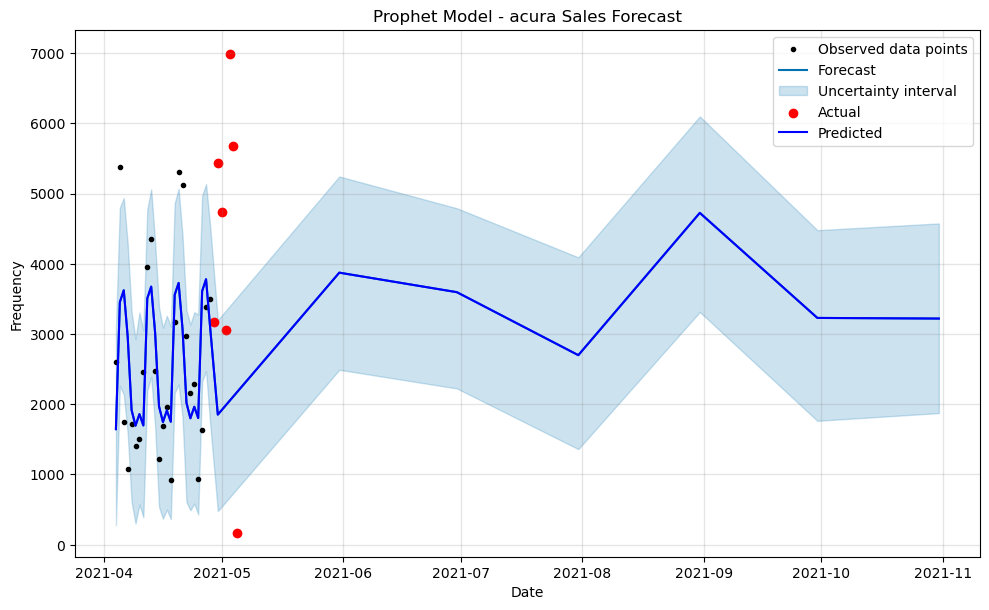

18:43:54 - cmdstanpy - INFO - Chain [1] start processing
18:43:54 - cmdstanpy - INFO - Chain [1] done processing


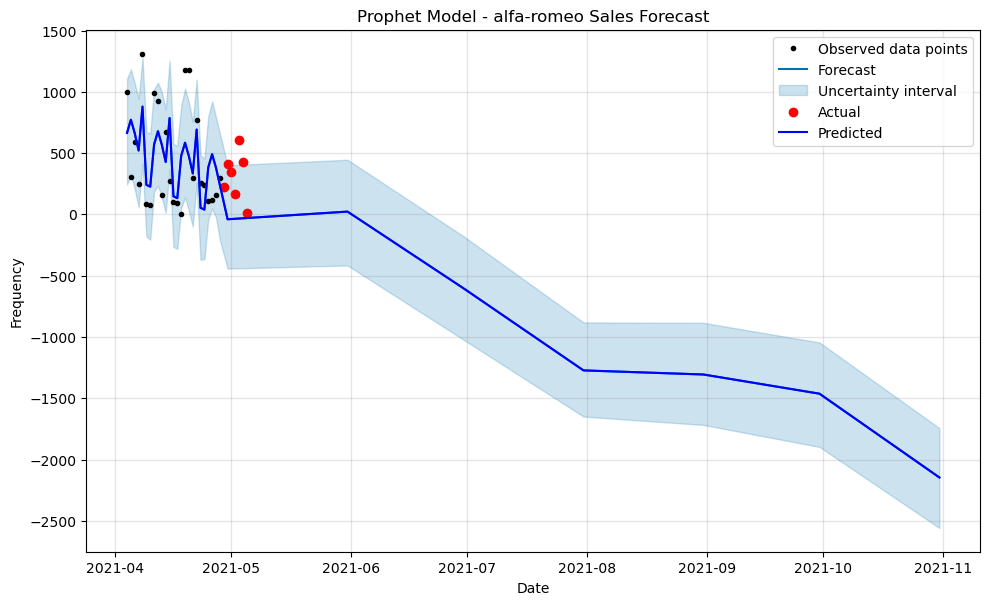

18:43:55 - cmdstanpy - INFO - Chain [1] start processing
18:43:55 - cmdstanpy - INFO - Chain [1] done processing


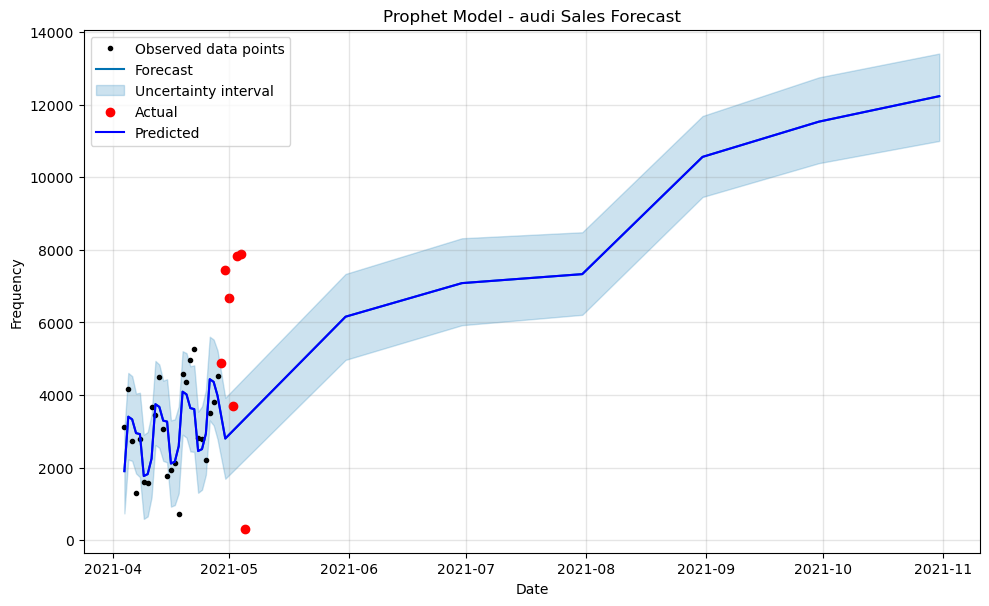

18:43:56 - cmdstanpy - INFO - Chain [1] start processing
18:43:56 - cmdstanpy - INFO - Chain [1] done processing


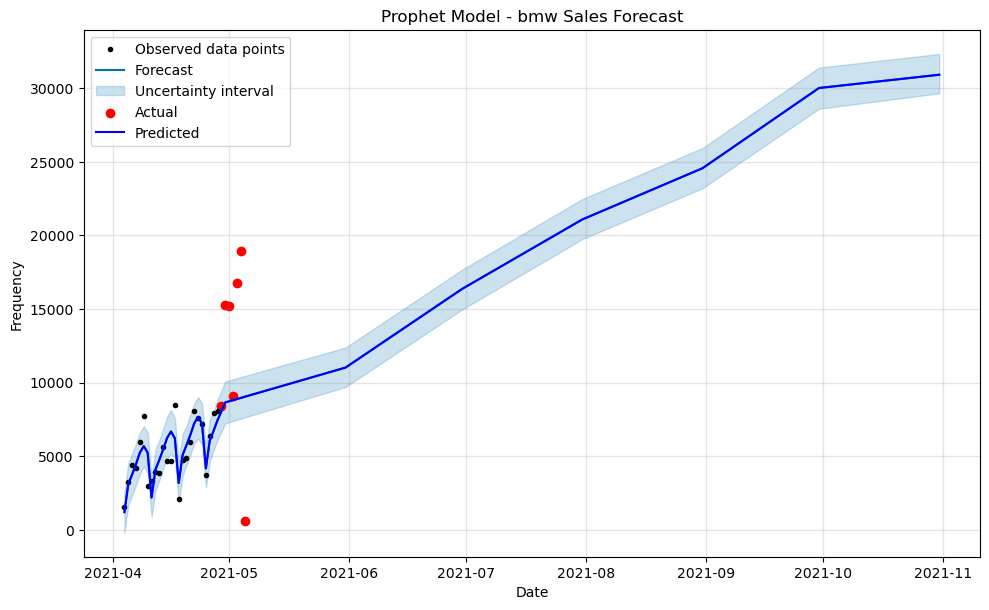

18:43:57 - cmdstanpy - INFO - Chain [1] start processing
18:43:57 - cmdstanpy - INFO - Chain [1] done processing


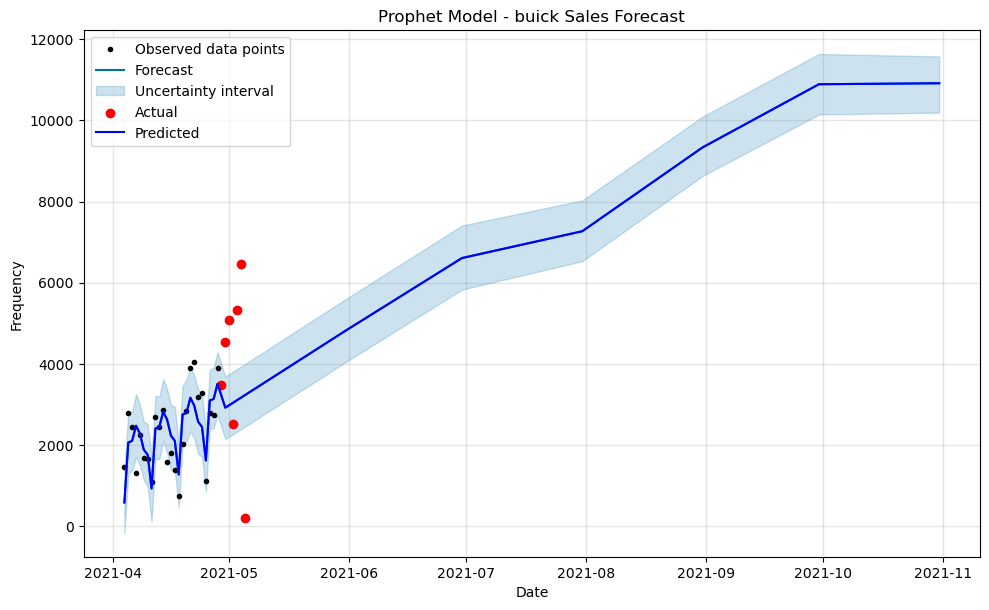

18:43:58 - cmdstanpy - INFO - Chain [1] start processing
18:43:58 - cmdstanpy - INFO - Chain [1] done processing


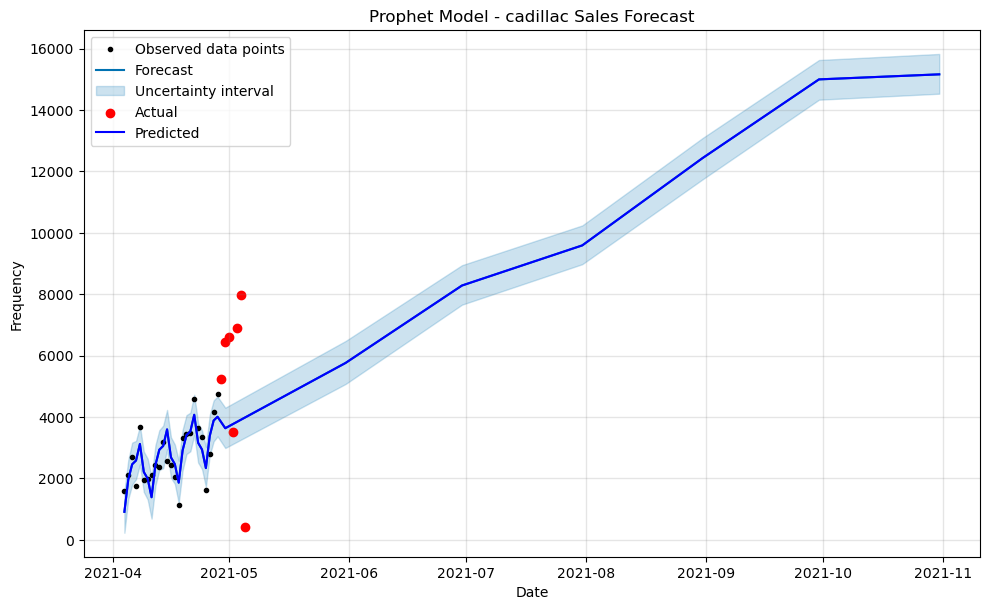

18:43:59 - cmdstanpy - INFO - Chain [1] start processing
18:43:59 - cmdstanpy - INFO - Chain [1] done processing


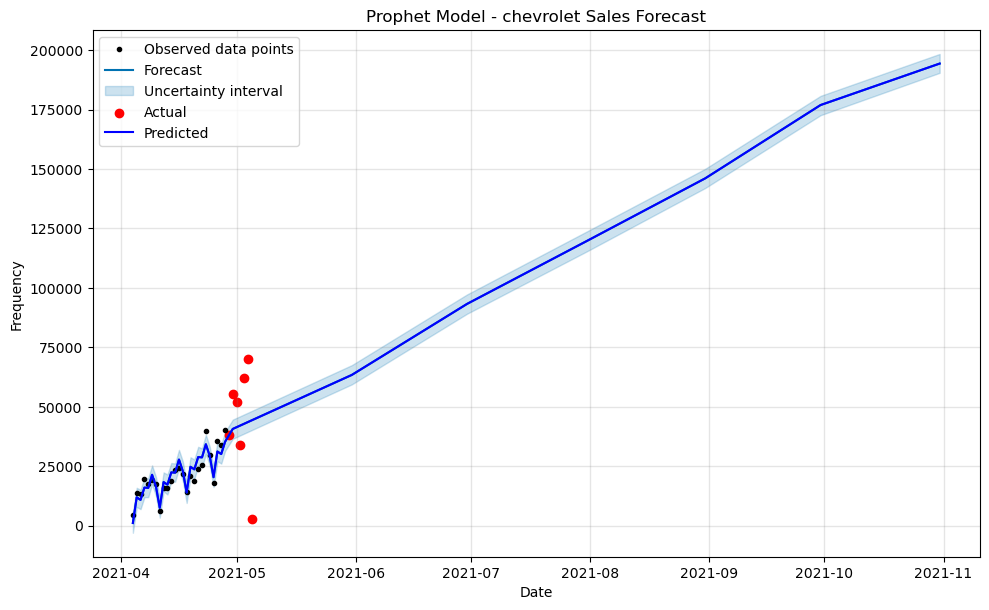

18:44:00 - cmdstanpy - INFO - Chain [1] start processing
18:44:01 - cmdstanpy - INFO - Chain [1] done processing


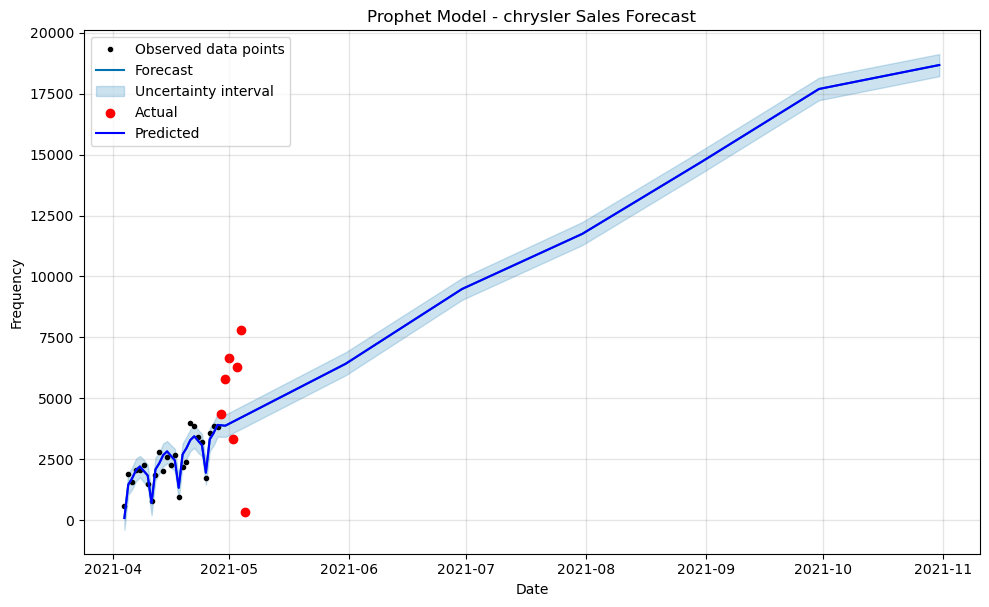

18:44:01 - cmdstanpy - INFO - Chain [1] start processing
18:44:02 - cmdstanpy - INFO - Chain [1] done processing


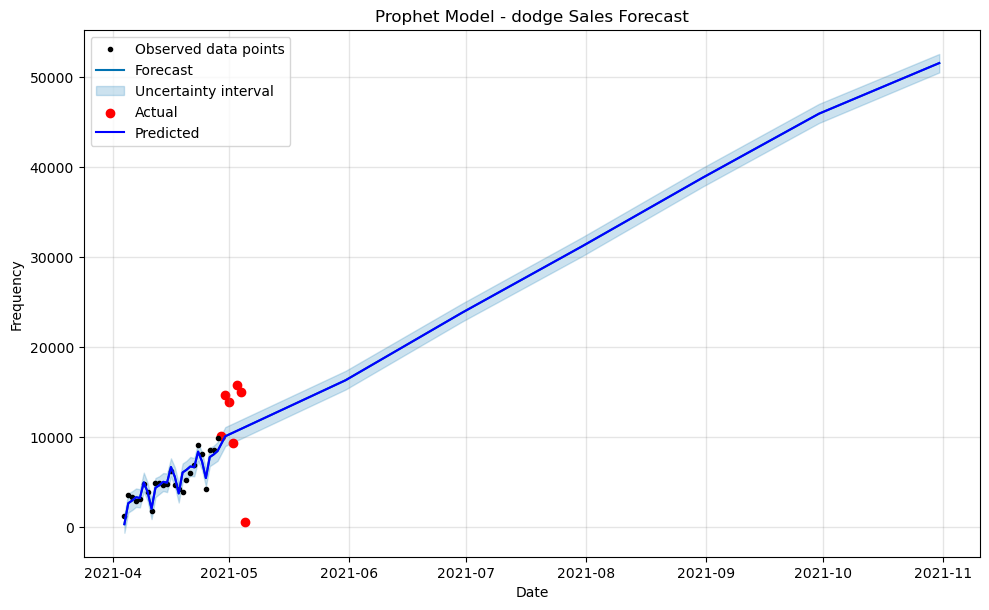

18:44:02 - cmdstanpy - INFO - Chain [1] start processing
18:44:03 - cmdstanpy - INFO - Chain [1] done processing


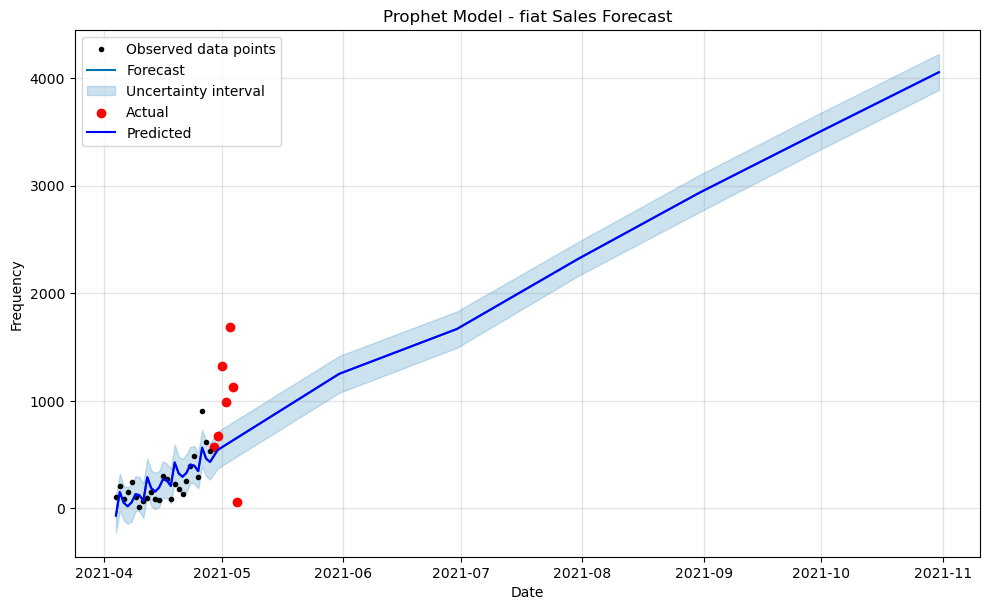

18:44:03 - cmdstanpy - INFO - Chain [1] start processing
18:44:04 - cmdstanpy - INFO - Chain [1] done processing


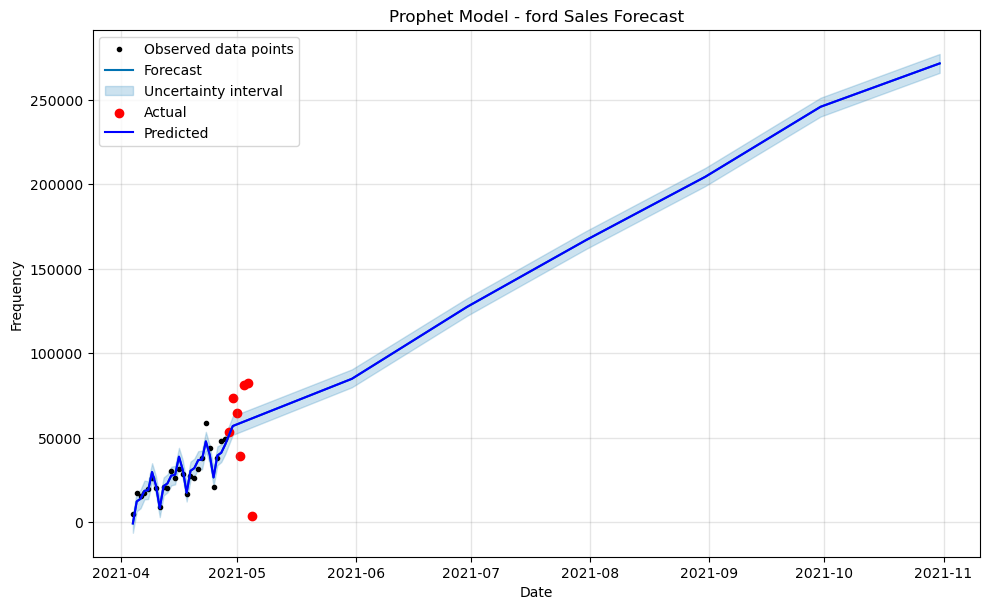

18:44:05 - cmdstanpy - INFO - Chain [1] start processing
18:44:05 - cmdstanpy - INFO - Chain [1] done processing


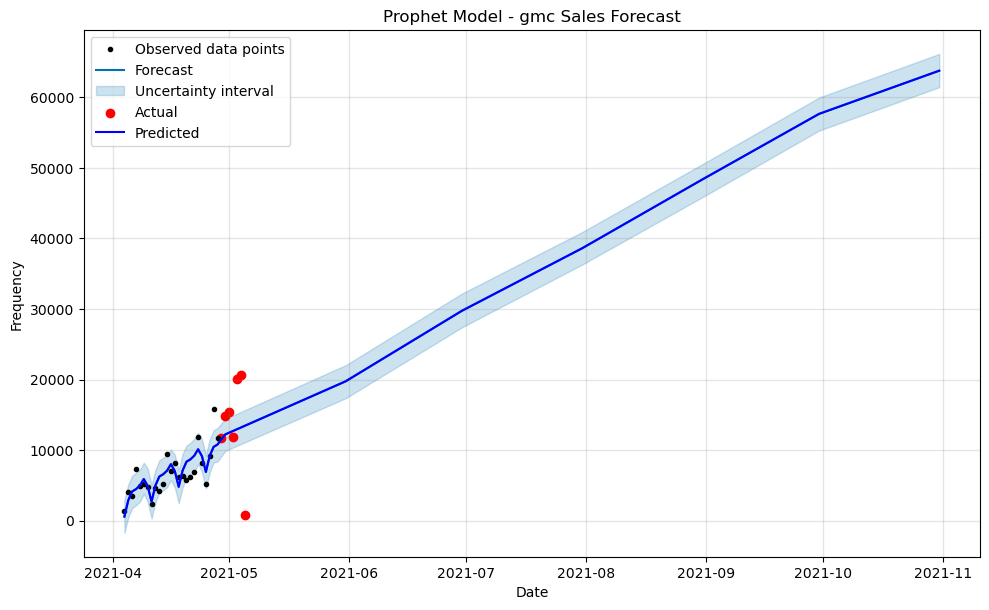

18:44:06 - cmdstanpy - INFO - Chain [1] start processing
18:44:06 - cmdstanpy - INFO - Chain [1] done processing


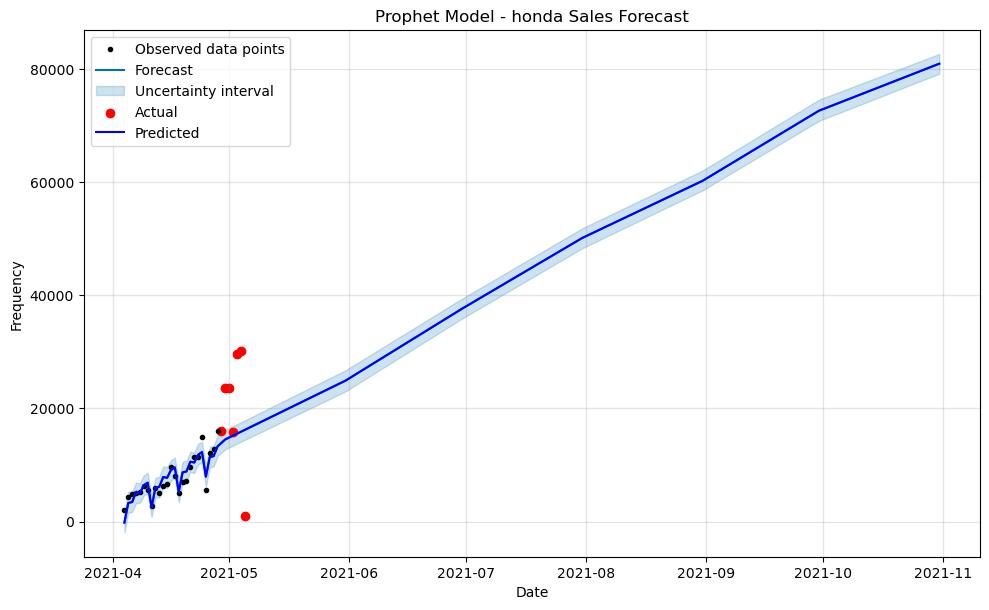

18:44:07 - cmdstanpy - INFO - Chain [1] start processing
18:44:07 - cmdstanpy - INFO - Chain [1] done processing


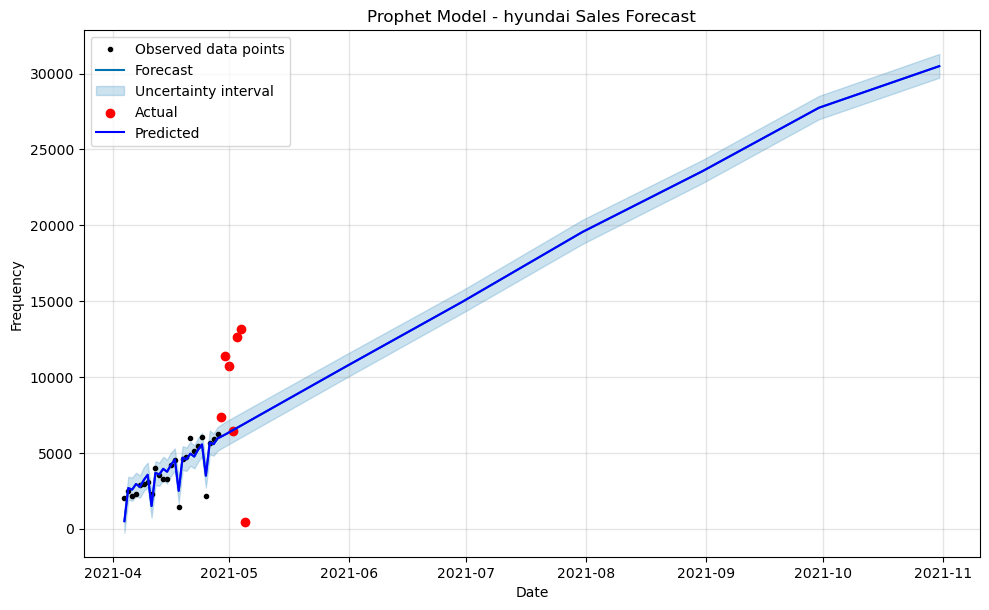

18:44:08 - cmdstanpy - INFO - Chain [1] start processing
18:44:08 - cmdstanpy - INFO - Chain [1] done processing


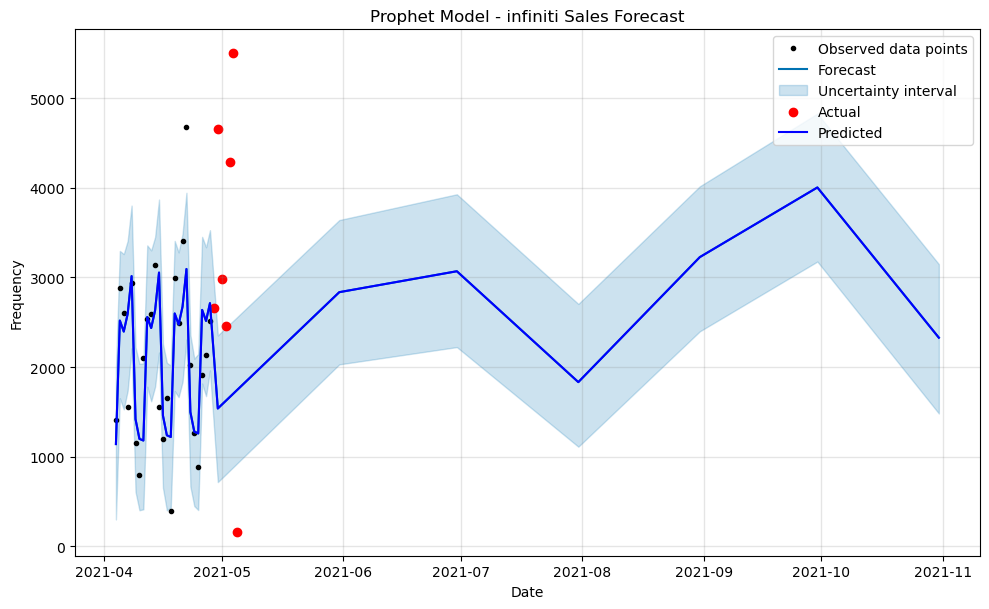

18:44:09 - cmdstanpy - INFO - Chain [1] start processing
18:44:09 - cmdstanpy - INFO - Chain [1] done processing


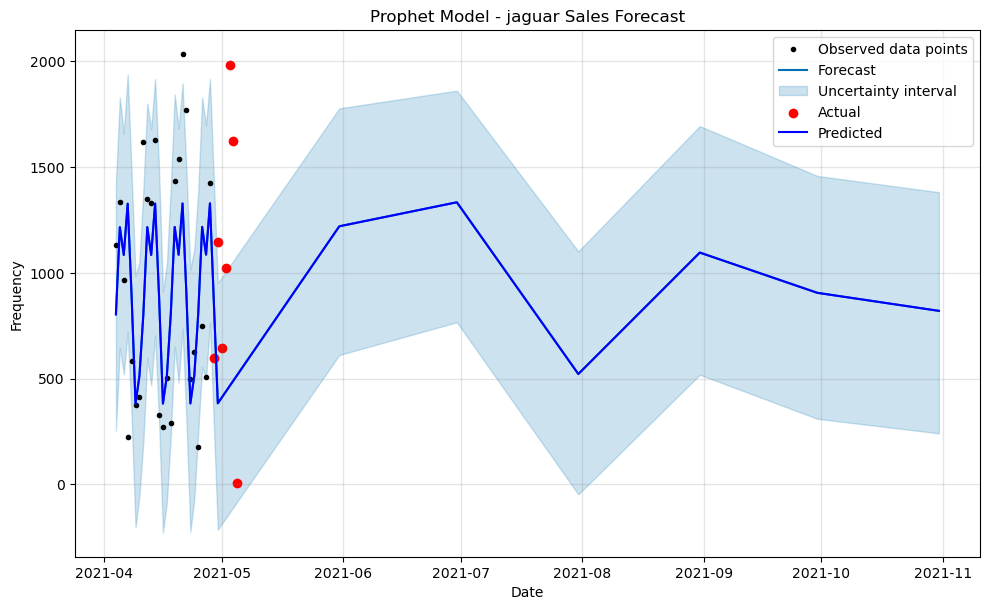

18:44:10 - cmdstanpy - INFO - Chain [1] start processing
18:44:10 - cmdstanpy - INFO - Chain [1] done processing


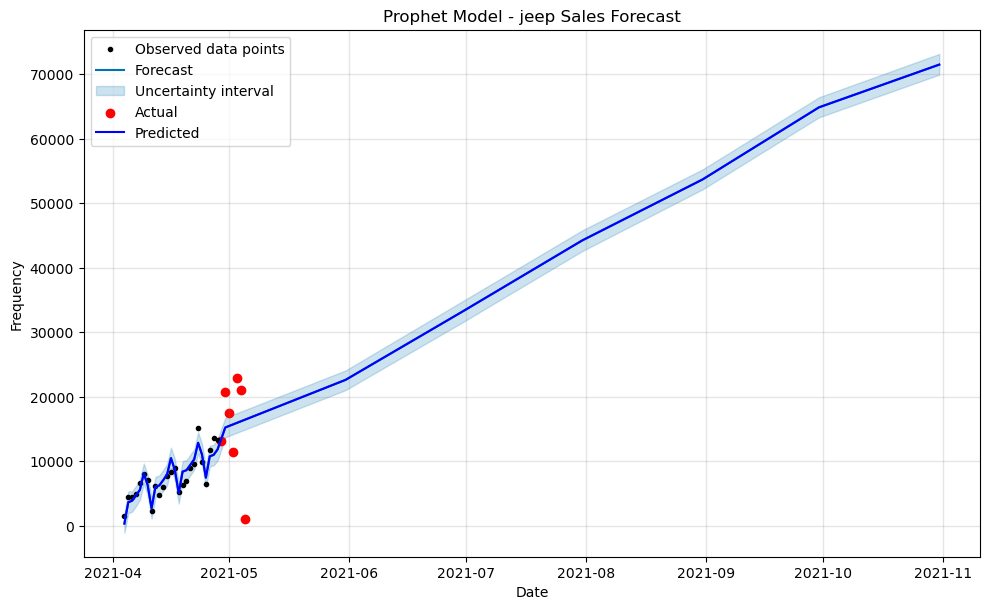

18:44:11 - cmdstanpy - INFO - Chain [1] start processing
18:44:11 - cmdstanpy - INFO - Chain [1] done processing


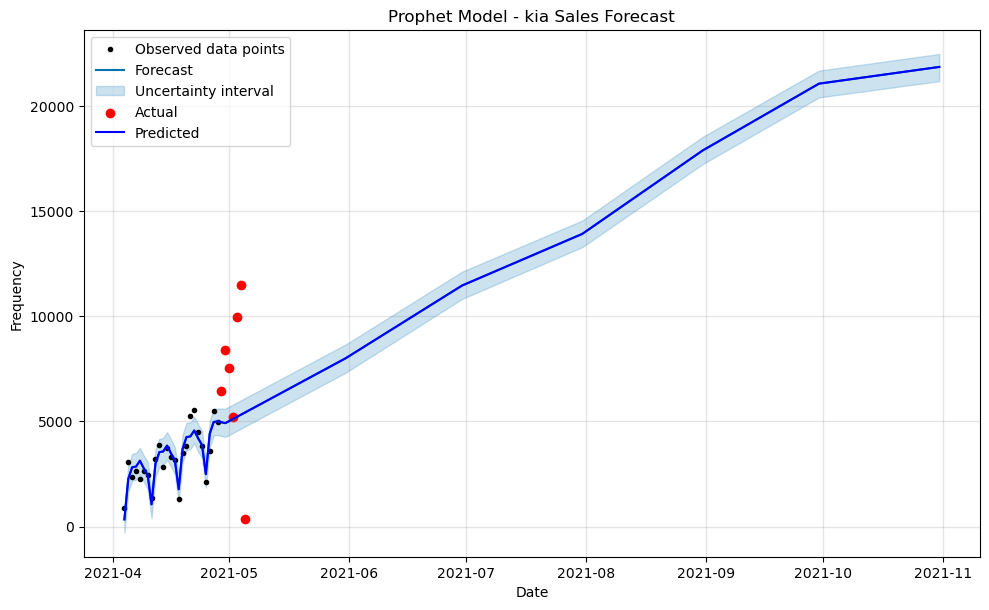

18:44:12 - cmdstanpy - INFO - Chain [1] start processing
18:44:12 - cmdstanpy - INFO - Chain [1] done processing


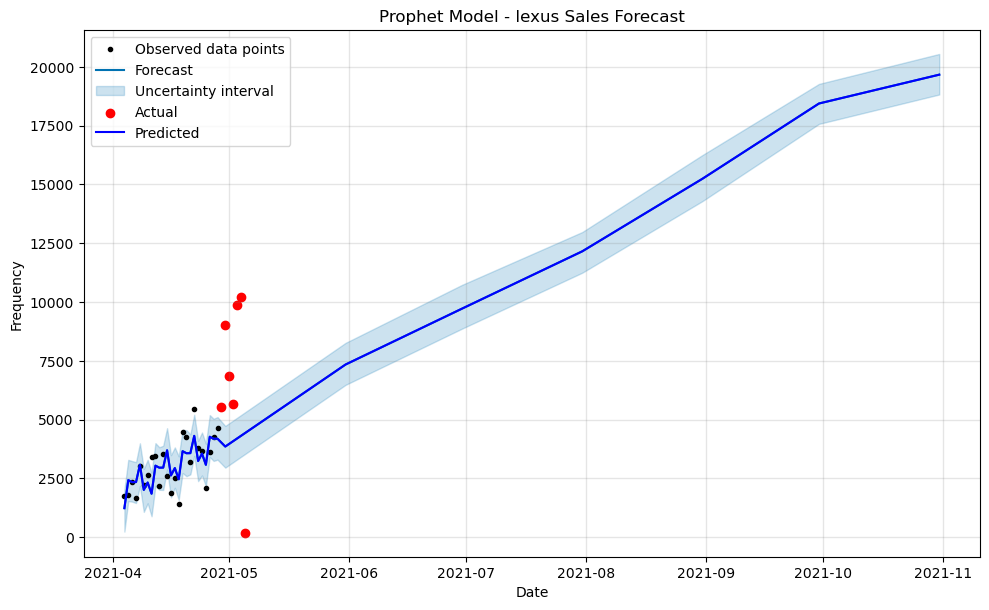

18:44:13 - cmdstanpy - INFO - Chain [1] start processing
18:44:13 - cmdstanpy - INFO - Chain [1] done processing


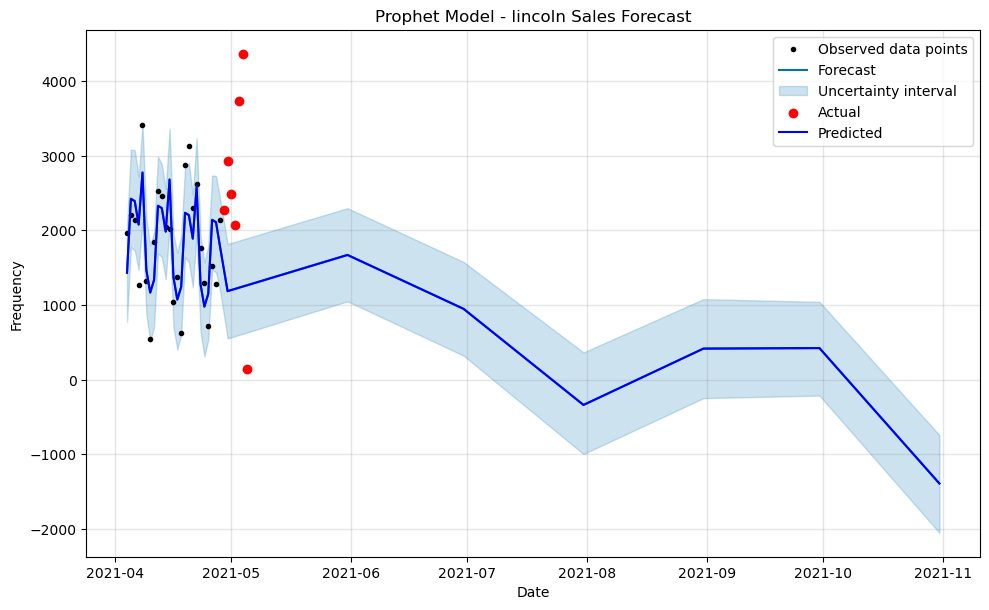

18:44:14 - cmdstanpy - INFO - Chain [1] start processing
18:44:14 - cmdstanpy - INFO - Chain [1] done processing


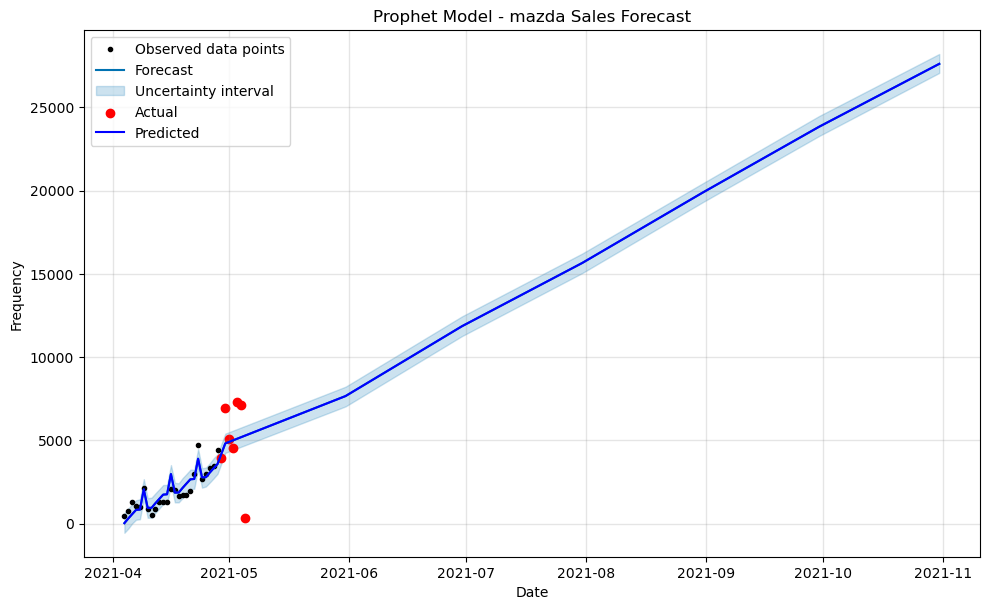

18:44:15 - cmdstanpy - INFO - Chain [1] start processing
18:44:15 - cmdstanpy - INFO - Chain [1] done processing


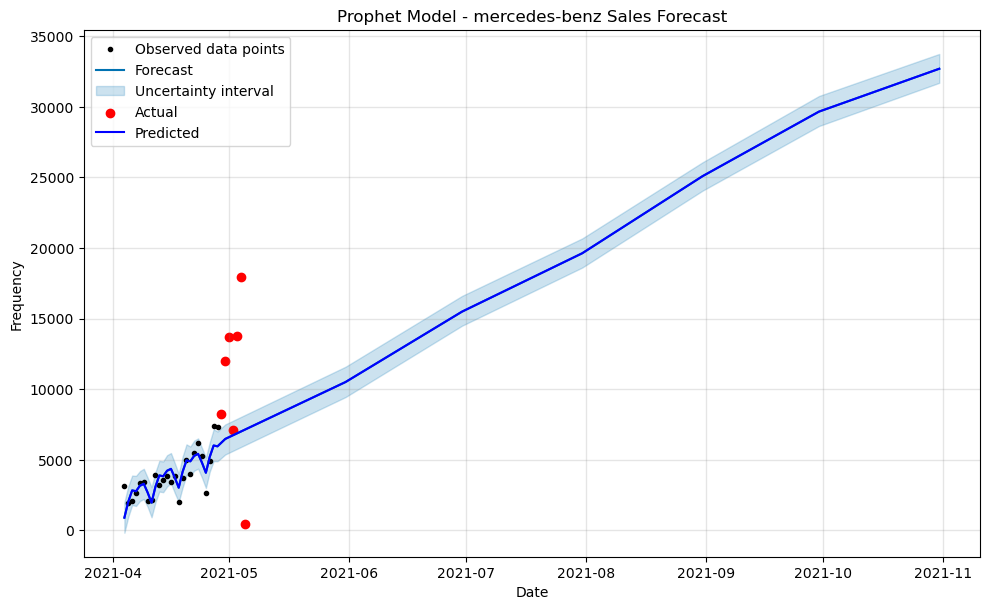

18:44:16 - cmdstanpy - INFO - Chain [1] start processing
18:44:16 - cmdstanpy - INFO - Chain [1] done processing


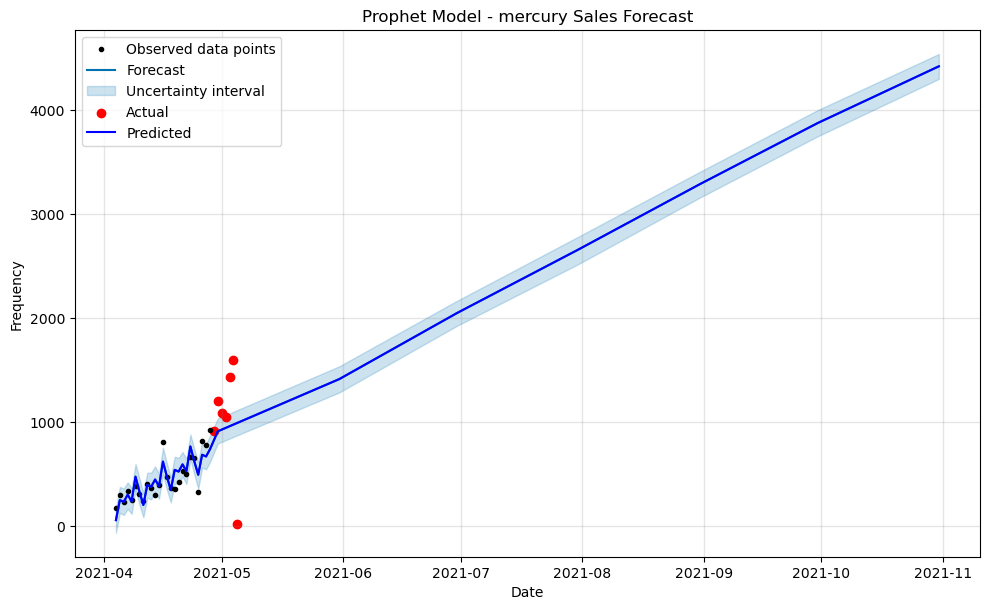

18:44:17 - cmdstanpy - INFO - Chain [1] start processing
18:44:17 - cmdstanpy - INFO - Chain [1] done processing


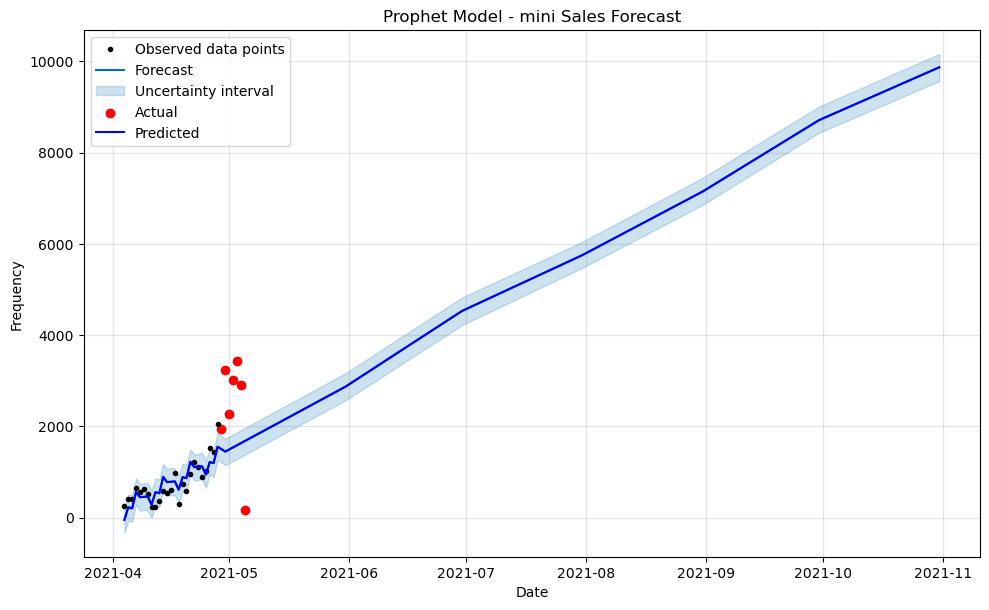

18:44:18 - cmdstanpy - INFO - Chain [1] start processing
18:44:18 - cmdstanpy - INFO - Chain [1] done processing


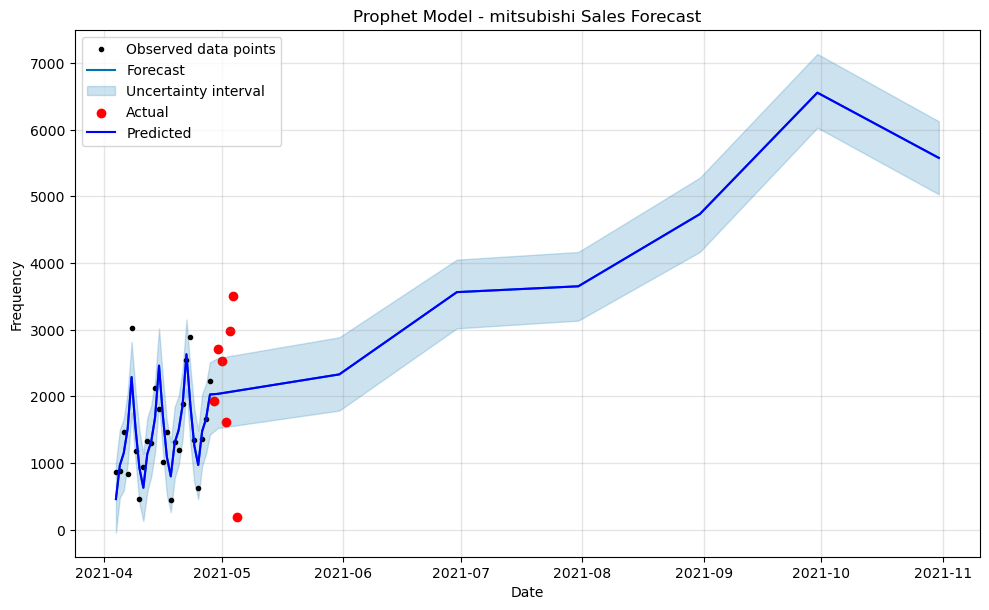

18:44:19 - cmdstanpy - INFO - Chain [1] start processing
18:44:19 - cmdstanpy - INFO - Chain [1] done processing


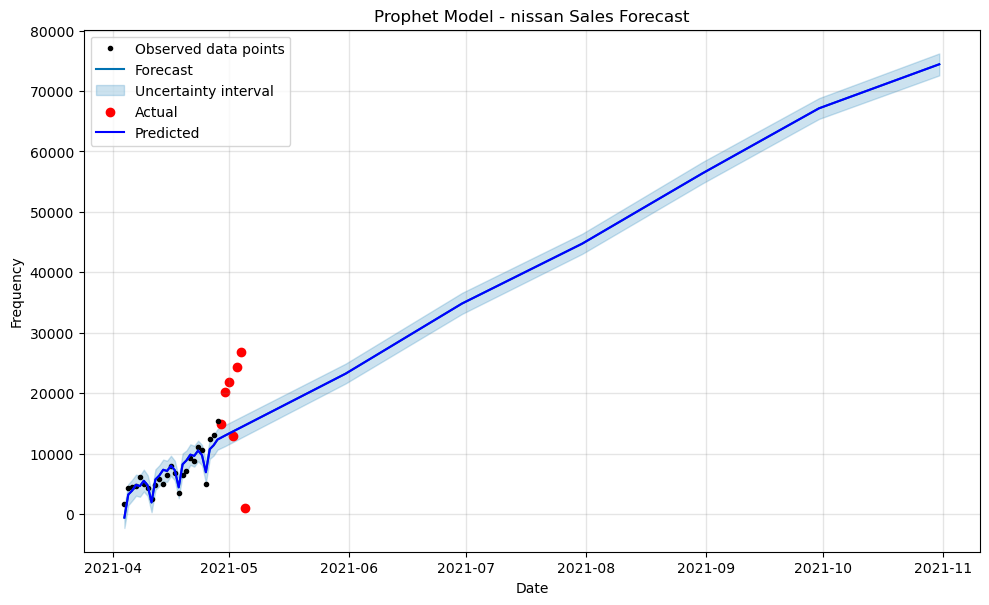

18:44:20 - cmdstanpy - INFO - Chain [1] start processing
18:44:20 - cmdstanpy - INFO - Chain [1] done processing


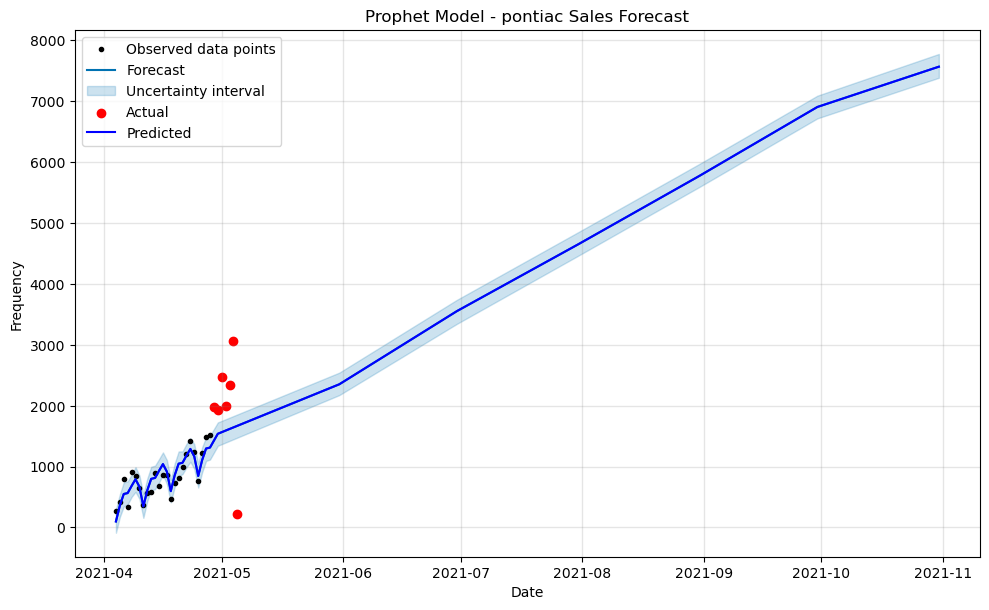

18:44:21 - cmdstanpy - INFO - Chain [1] start processing
18:44:22 - cmdstanpy - INFO - Chain [1] done processing


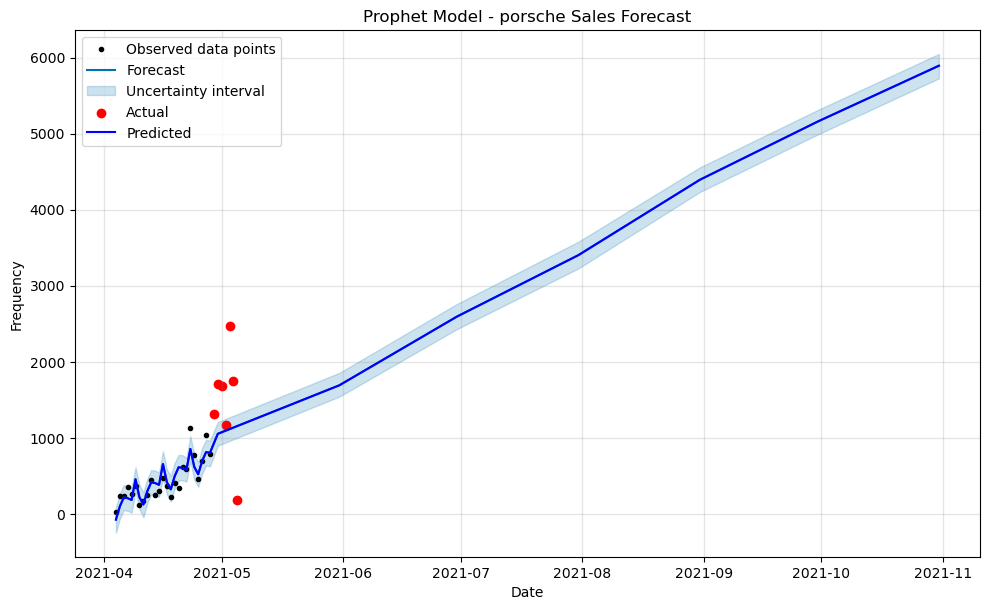

18:44:22 - cmdstanpy - INFO - Chain [1] start processing
18:44:23 - cmdstanpy - INFO - Chain [1] done processing


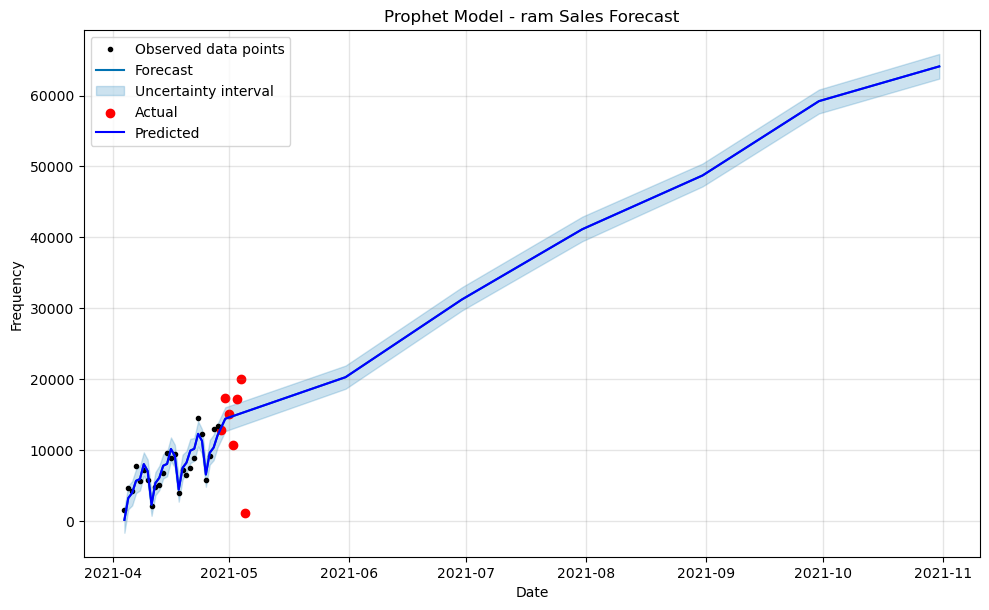

18:44:23 - cmdstanpy - INFO - Chain [1] start processing
18:44:24 - cmdstanpy - INFO - Chain [1] done processing


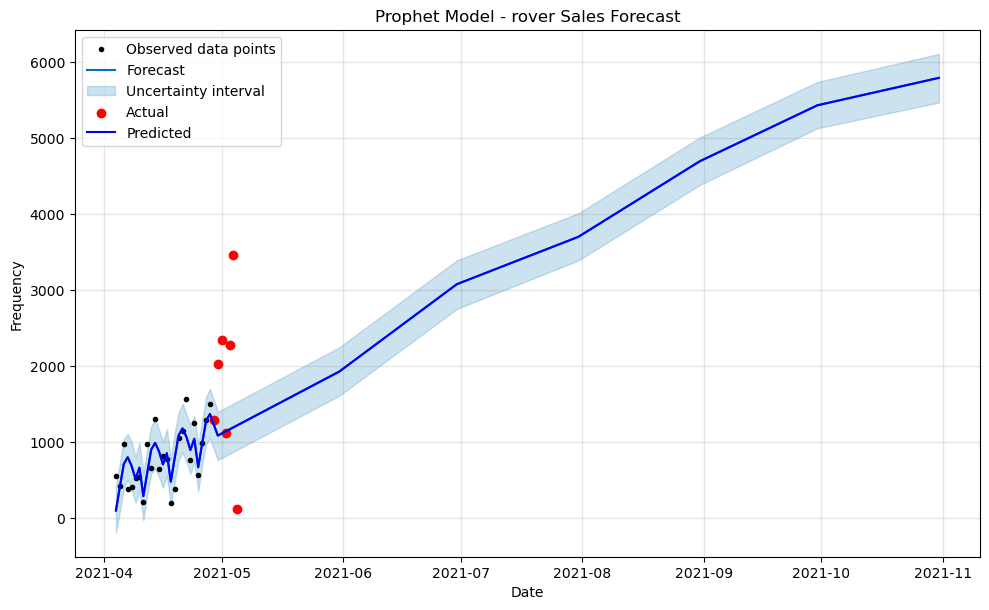

18:44:24 - cmdstanpy - INFO - Chain [1] start processing
18:44:25 - cmdstanpy - INFO - Chain [1] done processing


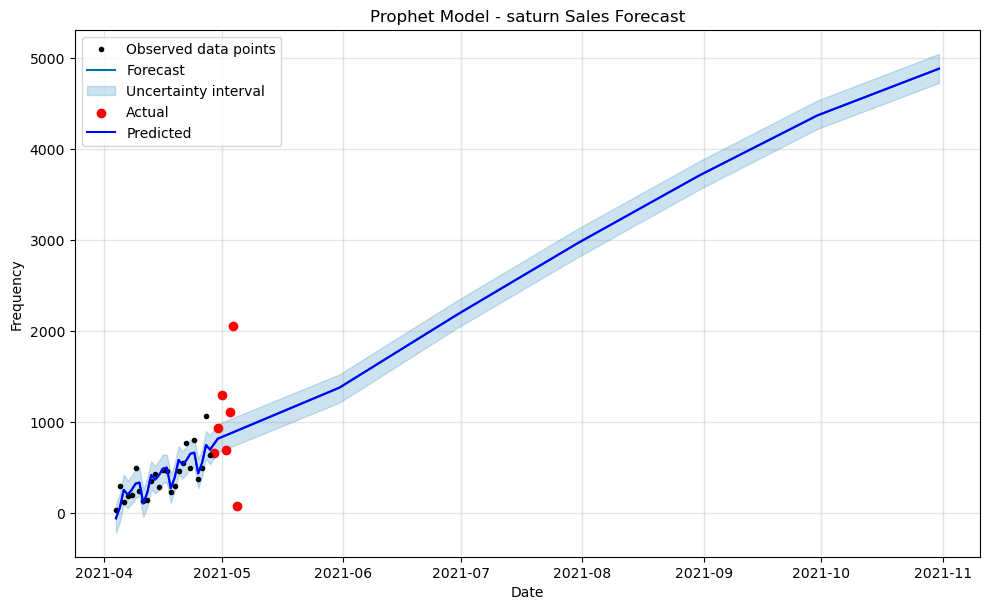

18:44:26 - cmdstanpy - INFO - Chain [1] start processing
18:44:26 - cmdstanpy - INFO - Chain [1] done processing


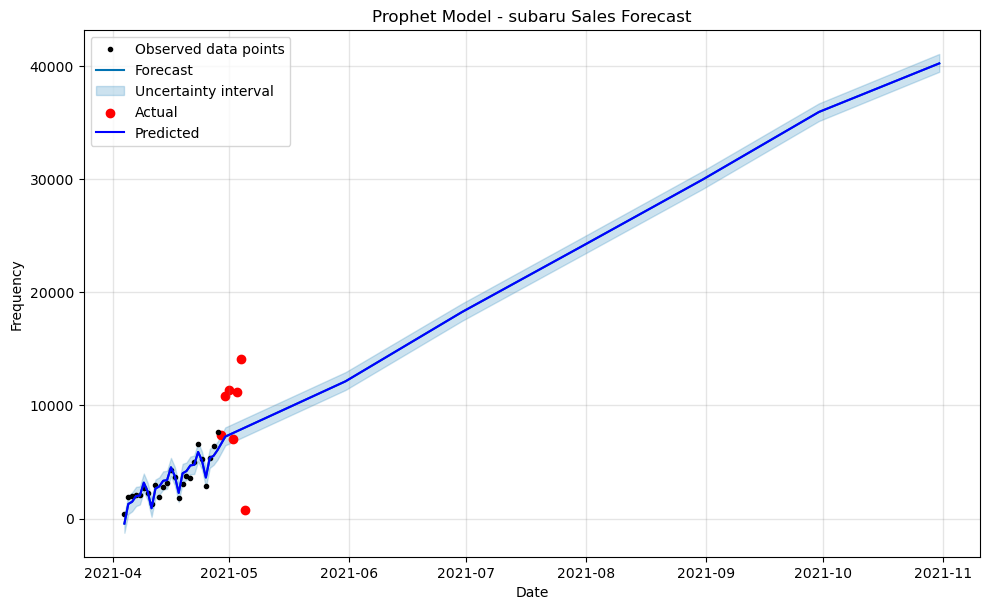

18:44:27 - cmdstanpy - INFO - Chain [1] start processing
18:44:27 - cmdstanpy - INFO - Chain [1] done processing


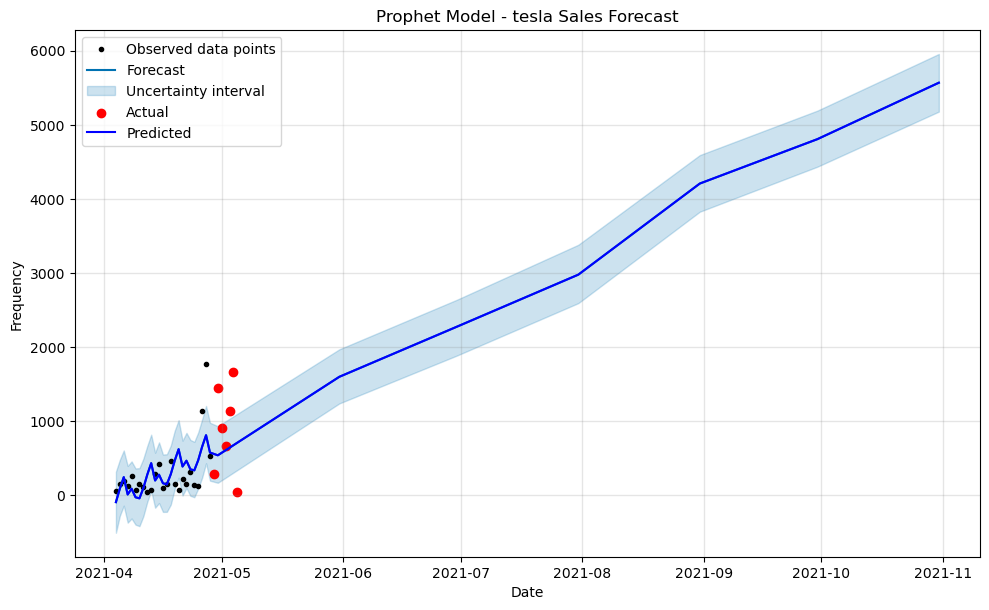

18:44:28 - cmdstanpy - INFO - Chain [1] start processing
18:44:28 - cmdstanpy - INFO - Chain [1] done processing


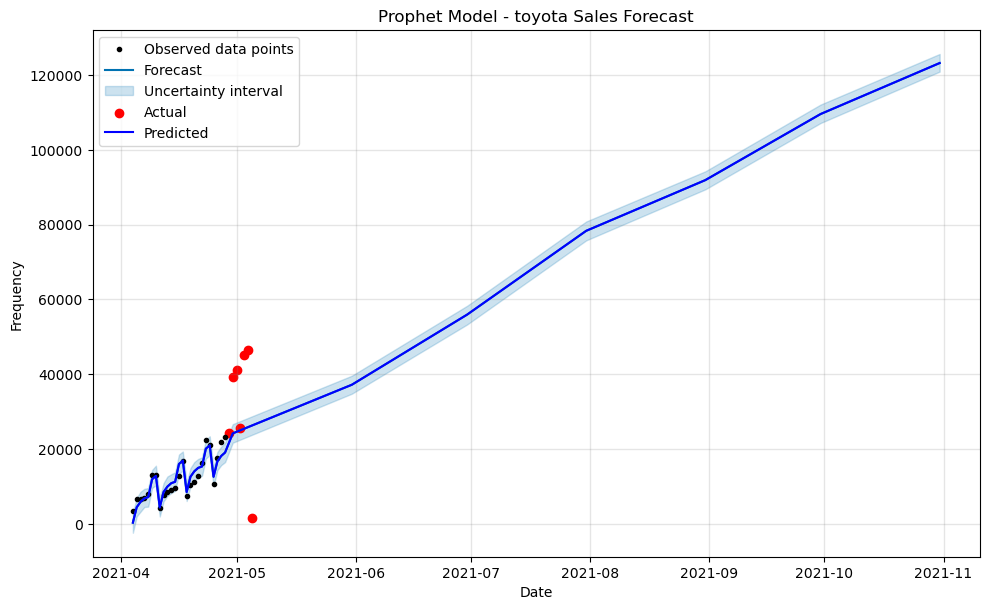

18:44:29 - cmdstanpy - INFO - Chain [1] start processing
18:44:29 - cmdstanpy - INFO - Chain [1] done processing


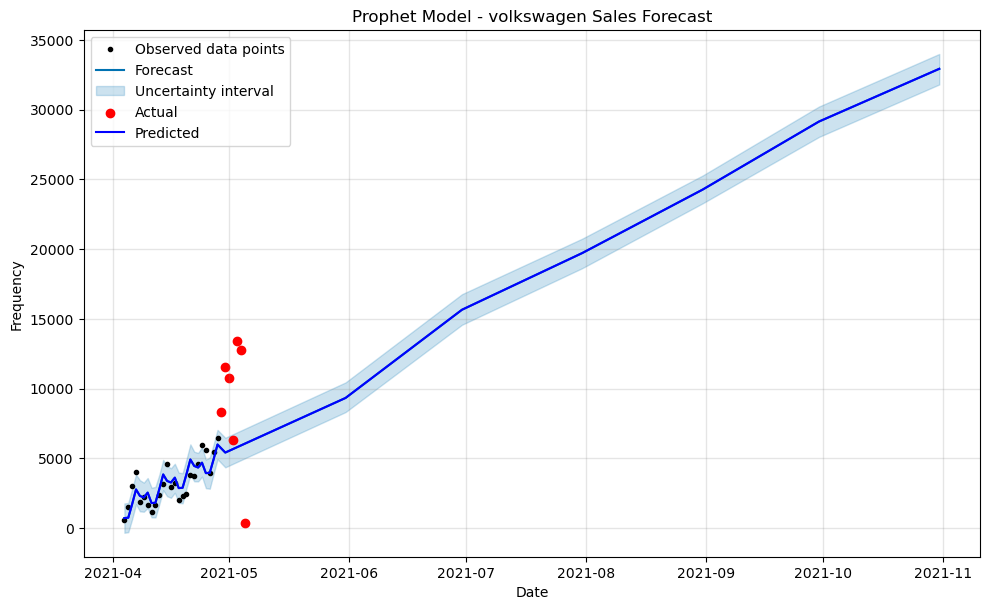

18:44:30 - cmdstanpy - INFO - Chain [1] start processing
18:44:30 - cmdstanpy - INFO - Chain [1] done processing


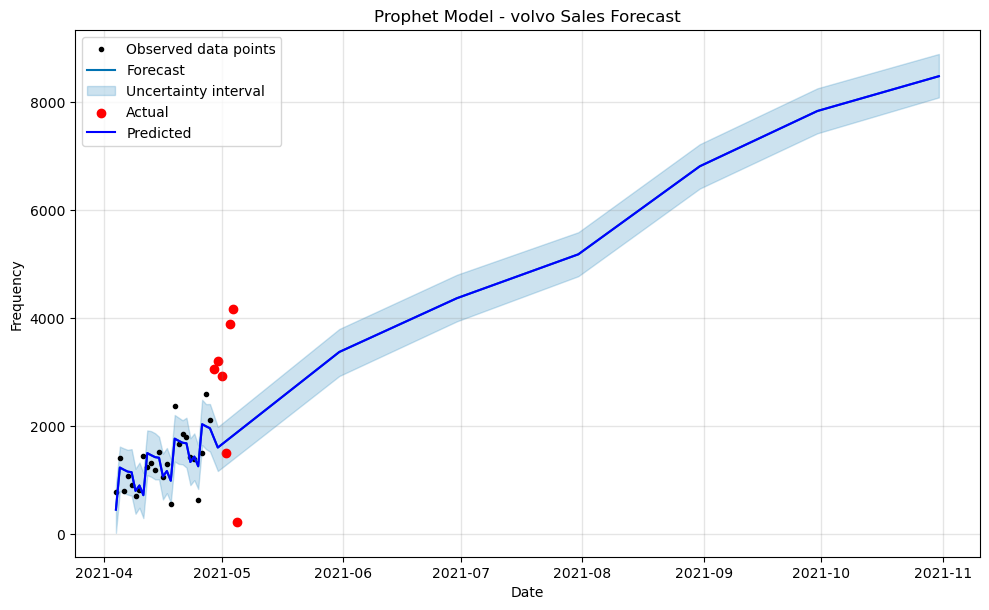

In [239]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming your data is stored in a variable named 'raw_data'
# raw_data = pd.read_csv('your_file_path.csv')  # Adjust the file path if needed

# Let's consider a subset of columns for simplicity
columns_of_interest = ['posting_date', 'manufacturer', 'time_diff']

# Extract the relevant columns
data = data5[columns_of_interest]

# Drop rows with missing values
data = data.dropna()

# Aggregate frequency data by date for simplicity
daily_data = data.groupby(['posting_date', 'manufacturer']).sum()['time_diff'].reset_index()

# Pivot the data to have manufacturers as columns
pivoted_data = daily_data.pivot(index='posting_date', columns='manufacturer', values='time_diff').fillna(0)

# Define the number of years for forecast
forecast_years = 5

# Iterate over each manufacturer
for target_manufacturer in pivoted_data.columns:
    target_series = pivoted_data[target_manufacturer].reset_index()

    # Rename columns as required by Prophet
    target_series.columns = ['ds', 'y']

    # Convert 'ds' to datetime without timezone
    target_series['ds'] = pd.to_datetime(target_series['ds']).dt.tz_localize(None)

    # Train-test split
    train_size = int(len(target_series) * 0.8)
    train, test = target_series[:train_size], target_series[train_size:]

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(train)

    # Create a DataFrame for the future dates
    future = model.make_future_dataframe(periods=len(test), freq='M')

    # Make predictions
    forecast = model.predict(future)

    # Plot actual vs. predicted sales
    fig = model.plot(forecast)
    
    # Customize colors for actual and predicted values
    plt.scatter(test['ds'], test['y'], color='red', label='Actual', marker='o')
    plt.plot(forecast['ds'], forecast['yhat'], color='blue', label='Predicted')

    plt.xlabel('Date')
    plt.ylabel('Frequency')
    plt.title(f'Prophet Model - {target_manufacturer} Sales Forecast')
    plt.legend()
    plt.show()
